In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc('figure', figsize=(16,9))

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from math import sqrt

from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.ensemble import IsolationForest, RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

# Wrangling

In [3]:
from preprocessing import spotify_split, scale_data #,modeling_prep 
from acquire import concat_csv_files
from prepare import prepare_df, set_index

In [4]:
def modeling_prep():
    '''
    This function prepares the data for modeling
    '''
    # all local csv data compiled into a dataframe
    df = concat_csv_files()
    # adds new features, handles nulls, fixes data types, 
    # set the index to track_id, and fixes the tempo feature
    df = prepare_df(df)
    df = df.drop(columns='album')
    #encode album_type
    album_dummies = pd.get_dummies(df.album_type, drop_first=False).astype('int')
    df = pd.concat([df, album_dummies], axis=1)

    # drop any columns that won't contribute to modeling

    df = df.drop(columns=['album_popularity','label', 'artist', 
                        'release_date', 'track_name', 'album_id', 'album_type',
                        'release_year', 'release_month', 'release_day', 'duration_minutes', 
                        'duration_seconds', 'decade', 'is_top_billboard_label'])
    return df

In [5]:
df = modeling_prep()

In [6]:
#genre = pd.read_csv('genre_count_df.csv')
#genre = set_index(genre)
#genre = genre[genre.columns[32:]]

In [7]:
#df = df.merge(genre, on='track_id', suffixes=[None, '_'])
#df = df.dropna()

In [8]:
#df.info()

In [9]:
#df.head(2)

In [10]:
#genre.head(2)

In [11]:
df.head(2)

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,popularity,disc_number,track_number,is_featured_artist,album,compilation,single
track_id,,,,,,,,,,,,,,,,,,,,
6mecZbKK3JDeMdFRNxsCV5,0.792,0.594,2,-8.544,1,0.300,0.0,0.244,0.351,82.512,232803,4,1,43,1,1,0,0,0,1
5PtMwNq8Dp31uYdGGacVJE,0.816,0.578,9,-6.912,1,0.233,0.0,0.114,0.265,148.077,193920,4,1,61,1,11,0,1,0,0


In [12]:
df.shape

(5733, 20)

---
### Split the Data

In [13]:
X_train, y_train, X_validate, y_validate, X_test, y_test, train, validate, test = spotify_split(df, 'popularity')
X_train.head(2)

Shape of train: (4012, 19) | Shape of validate: (861, 19) | Shape of test: (860, 19)
Percent train: 70.0        | Percent validate: 15.0       | Percent test: 15.0


,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,disc_number,track_number,is_featured_artist,album,compilation,single
track_id,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,0.585,0.471,4,-9.934,0,0.0616,0.0184,0.115,0.323,93.099,142000,4,1,1,1,0,0,0,1
0HO8pCseEpgozNi3z0R4bc,0.833,0.518,10,-10.126,0,0.3490,0.0000,0.635,0.773,90.004,120000,4,1,1,11,0,1,0,0


---
### Scale the Data

In [14]:
#  Using MIN-MAX scaler
X_train_mm, X_validate_mm, X_test_mm = scale_data(train, validate, test, 'popularity', 'MinMax')
X_train_mm.head(3)

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,disc_number,track_number,is_featured_artist,album,compilation,single
track_id,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,0.593306,0.439493,0.363636,0.580823,0.0,0.064033,0.019127,0.101302,0.328921,0.547673,0.234238,0.8,1.0,0.0,0.000000,0.0,0.0,0.0,1.0
0HO8pCseEpgozNi3z0R4bc,0.844828,0.489960,0.909091,0.572667,0.0,0.362786,0.000000,0.651741,0.787169,0.529466,0.194025,0.8,1.0,0.0,0.163934,0.0,1.0,0.0,0.0
643K3eEgRvdJiXjSzlz7dg,0.477688,0.654247,0.090909,0.745826,1.0,0.354470,0.000000,0.305600,0.865580,0.520216,0.435841,0.8,1.0,0.0,0.016393,0.0,1.0,0.0,0.0


--- 
# Feature Selection

In [15]:
from preprocessing import rfe, select_kbest

In [16]:
skb_features = select_kbest(X_train_mm, y_train, 5)
skb_features

['speechiness', 'explicit', 'track_number', 'is_featured_artist', 'single']

In [17]:
rfe_features = rfe(X_train, y_train, 5)
rfe_features

['danceability', 'energy', 'speechiness', 'explicit', 'is_featured_artist']

In [18]:
# Select K Best Top 5 Features DF
X_tr_skb = X_train_mm[skb_features]
X_v_skb = X_validate_mm[skb_features]
X_te_skb = X_test_mm[skb_features]

In [19]:
# Recursive Feature Elimination Top 5 Features DF
X_tr_rfe = X_train_mm[rfe_features]
X_v_rfe = X_validate_mm[rfe_features]
X_te_rfe = X_test_mm[rfe_features]

In [20]:
# Combo Top 5 Features
top_feats = ['danceability', 'speechiness', 'explicit', 'is_featured_artist', 'single']
X_tr_top = X_train_mm[top_feats]
X_v_top = X_validate_mm[top_feats]
X_te_top = X_test_mm[top_feats]

---
# Cross Validation
- Optimize Hyperparameters

### CV Using SKB Features

In [21]:
from crossval import crossval_GSCV#, PolynomialRegression
from sklearn.svm import SVR

In [22]:
# OLS
params = {'fit_intercept': [True, False],
         'normalize': [True, False]}
lm = LinearRegression()
crossval_GSCV(params, lm, X_tr_skb, y_train).head(3)

,fit_intercept,normalize,RMSE
0,True,True,-21.942778
1,True,False,-21.942778
2,False,True,-24.605475


In [23]:
# LASSO + LARS
params = {'fit_intercept': [True, False],
          'alpha': [.0001, .001, .01]
         }
lars = LassoLars()
crossval_GSCV(params, lars, X_tr_skb, y_train).head(3)

,alpha,fit_intercept,RMSE
0,0.0001,True,-21.942764
2,0.0010,True,-21.942866
4,0.0100,True,-21.966555


In [24]:
# Support Vector Regressor
params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
          'gamma': ['scale', 'auto']
         }
svr = SVR()
crossval_GSCV(params, svr, X_tr_skb, y_train).head(3)

,gamma,kernel,RMSE
0,scale,linear,-22.018246
4,auto,linear,-22.018246
2,scale,rbf,-22.049793


In [25]:
# Genralized Linear Model with Tweedie Regressor
params = {'power': [0, 1], 
          'alpha': [0, 1],
          'link': ['auto', 'log']
         }
glm = TweedieRegressor()
crossval_GSCV(params, glm, X_tr_skb, y_train).head(3)

,alpha,link,power,RMSE
0,0,auto,0,-21.942779
1,0,auto,1,-21.972706
3,0,log,1,-21.972706


### CV Using RFE Features

In [26]:
# OLS
params = {'fit_intercept': [True, False],
         'normalize': [True, False]}
lm = LinearRegression()
crossval_GSCV(params, lm, X_tr_rfe, y_train).head(3)

,fit_intercept,normalize,RMSE
0,True,True,-22.069269
1,True,False,-22.069269
2,False,True,-22.420802


In [27]:
# LASSO + LARS
params = {'fit_intercept': [True, False],
          'alpha': [.0001, .001, .01]
         }
lars = LassoLars()
crossval_GSCV(params, lars, X_tr_rfe, y_train).head(3)

,alpha,fit_intercept,RMSE
0,0.0001,True,-22.069267
2,0.0010,True,-22.069507
4,0.0100,True,-22.097071


In [28]:
# Support Vector Regressor
params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
          'gamma': ['scale', 'auto']
         }
svr = SVR()
crossval_GSCV(params, svr, X_tr_rfe, y_train).head(3)

,gamma,kernel,RMSE
2,scale,rbf,-22.139727
0,scale,linear,-22.143176
4,auto,linear,-22.143176


In [29]:
# Genralized Linear Model with Tweedie Regressor
params = {'power': [0, 1], 
          'alpha': [0, 1]
         }
glm = TweedieRegressor()
crossval_GSCV(params, glm, X_tr_rfe, y_train).head(3)

,alpha,power,RMSE
0,0,0,-22.069263
1,0,1,-22.076005
3,1,1,-22.164354


too complicated at the moment

---
# Modeling
### Set the baseline

In [30]:
from model import get_baseline_metrics, linear_regression_model, lasso_lars
from model import polynomial_regression, svr_model, glm_model, evaluate_df
from model import visualize_model, visualize_error

In [31]:
bl, bl_train_rmse = get_baseline_metrics(y_train)

RMSE (Root Mean Square Error) of Baseline on train data:
 22.897138


---
### Models using ALL Features

In [32]:
# OLS Model
lm_rmse, lm_rmse_v, lm_rmse_t = linear_regression_model(
    X_train_mm, y_train, X_validate_mm, y_validate, X_test_mm, y_test)
# LASSO + LARS Model
lars_rmse, lars_rmse_v, lars_rmse_t = lasso_lars(
    X_train_mm, y_train, X_validate_mm, y_validate, X_test_mm, y_test)
# Polynomial Features (squared, deg=2) with Linear Regression
lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t, lm_sq_pred_t = polynomial_regression(
    X_train_mm, y_train, X_validate_mm, y_validate, X_test_mm, y_test, 
    'Squared', degree=2) 
# Support Vector Regression with RBF Kernel
svr_rmse, svr_rmse_v, svr_rmse_t = svr_model(
    X_train_mm, y_train, X_validate_mm, y_validate, X_test_mm, y_test, 'RBF')
# General Linearized Model with Normal Distribution
glm_rmse, glm_rmse_v, glm_rmse_t, glm_pred_t = glm_model(
    X_train_mm, y_train, X_validate_mm, y_validate, X_test_mm, y_test, 
    'Normal', alpha=0, power=1)

RMSE for OLS using Linear Regression 

On train data:
 21.487177 

RMSE for LASSO + LARS 

On train data:
 22.897138 

RMSE for Polynomial Squared + Linear Regression 

On train data:
 20.693288 

RMSE for SVR using RBF Kernel 

On train data:
 21.660053 

RMSE for GLM using Normal Distribution 

On train data:
 21.510856 



In [33]:
columns = ['train_rmse', 'validate_rmse', 'test_rmse']
index = ['baseline', 'ols', 'lassolars', 'pf2_lr', 'SVM', 'GLM']
data = [[bl_train_rmse, '', ''],
        [lm_rmse, lm_rmse_v, ''],
        [lars_rmse, lars_rmse_v, ''],
        [lm_sq_rmse, lm_sq_rmse_v, ''], 
        [svr_rmse, svr_rmse_v, ''],
        [glm_rmse, glm_rmse_v, '']]
print('ALL FEATURES')
print(f'Model beat baseline by {abs((glm_rmse_t - bl_train_rmse)/bl_train_rmse)*100:.2f}%')
pd.DataFrame(columns=columns, data=data, index=index).sort_values(by='train_rmse')

ALL FEATURES
Model beat baseline by 6.62%


,train_rmse,validate_rmse,test_rmse
pf2_lr,20.693288,21.5614,
ols,21.487177,21.3973,
GLM,21.510856,21.3814,
SVM,21.660053,21.6534,
baseline,22.897138,,
lassolars,22.897138,22.8377,


In [50]:
# create the model object
glm = TweedieRegressor(alpha = 0, power= 1)

# fit the model to our training data
glm.fit(X_train_mm, y_train)
feature_importances = pd.DataFrame(glm.coef_,
                                       index = X_train_mm.columns,
                                        columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(5)#, feature_importances.tail(5)

,importance
loudness,1.151842
danceability,0.210151
explicit,0.205623
is_featured_artist,0.171641
tempo,0.142183


---
### Models using SKB Features

In [35]:
# OLS Model
lm_rmse, lm_rmse_v, lm_rmse_t = linear_regression_model(
    X_tr_skb, y_train, X_v_skb, y_validate, X_te_skb, y_test)
# LASSO + LARS Model
lars_rmse, lars_rmse_v, lars_rmse_t = lasso_lars(
    X_tr_skb, y_train, X_v_skb, y_validate, X_te_skb, y_test)
# Polynomial Features (squared, deg=2) with Linear Regression
lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t, lm_sq_pred_t = polynomial_regression(
    X_tr_skb, y_train, X_v_skb, y_validate, X_te_skb, y_test, 
    'Squared', degree=2) 
# Support Vector Regression with RBF Kernel
svr_rmse, svr_rmse_v, svr_rmse_t = svr_model(
    X_tr_skb, y_train, X_v_skb, y_validate, X_te_skb, y_test, 'RBF')
# General Linearized Model with Normal Distribution
glm_rmse, glm_rmse_v, glm_rmse_t, glm_pred_t = glm_model(
    X_tr_skb, y_train, X_v_skb, y_validate, X_te_skb, y_test, 
    'Normal', alpha=0, power=1)

RMSE for OLS using Linear Regression 

On train data:
 21.905982 

RMSE for LASSO + LARS 

On train data:
 22.897138 

RMSE for Polynomial Squared + Linear Regression 

On train data:
 21.82078 

RMSE for SVR using RBF Kernel 

On train data:
 21.960632 

RMSE for GLM using Normal Distribution 

On train data:
 21.934884 



In [36]:
columns = ['train_rmse', 'validate_rmse', 'test_rmse']
index = ['baseline', 'ols', 'lassolars', 'pf2_lr', 'SVM', 'GLM']
data = [[bl_train_rmse, '', ''],
        [lm_rmse, lm_rmse_v, ''],
        [lars_rmse, lars_rmse_v, ''],
        [lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t], 
        [svr_rmse, svr_rmse_v, ''],
        [glm_rmse, glm_rmse_v, '']]
print('SKB FEATURES')
print(f'Model beat baseline by {abs((lm_sq_rmse_t - bl_train_rmse)/bl_train_rmse)*100:.2f}%')
print(skb_features)
pd.DataFrame(columns=columns, data=data, index=index).sort_values(by='train_rmse')

SKB FEATURES
Model beat baseline by 5.16%
['speechiness', 'explicit', 'track_number', 'is_featured_artist', 'single']


,train_rmse,validate_rmse,test_rmse
pf2_lr,21.820780,21.8672,21.7162
ols,21.905982,21.9519,
GLM,21.934884,21.9476,
SVM,21.960632,21.9514,
baseline,22.897138,,
lassolars,22.897138,22.8377,


---
### Models using RFE Features

In [37]:
# OLS Model
lm_rmse, lm_rmse_v, lm_rmse_t = linear_regression_model(
    X_tr_rfe, y_train, X_v_rfe, y_validate, X_te_rfe, y_test)
# LASSO + LARS Model
lars_rmse, lars_rmse_v, lars_rmse_t = lasso_lars(
    X_tr_rfe, y_train, X_v_rfe, y_validate, X_te_rfe, y_test)
# Polynomial Features (squared, deg=2) with Linear Regression
lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t, lm_sq_pred_t = polynomial_regression(
    X_tr_rfe, y_train, X_v_rfe, y_validate, X_te_rfe, y_test, 
    'Squared', degree=2) 
# Support Vector Regression with RBF Kernel
svr_rmse, svr_rmse_v, svr_rmse_t = svr_model(
    X_tr_rfe, y_train, X_v_rfe, y_validate, X_te_rfe, y_test, 'RBF')
# General Linearized Model with Normal Distribution
glm_rmse, glm_rmse_v, glm_rmse_t, glm_pred_t = glm_model(
    X_tr_rfe, y_train, X_v_rfe, y_validate, X_te_rfe, y_test, 
    'Normal', alpha=0, power=1)

RMSE for OLS using Linear Regression 

On train data:
 22.020966 

RMSE for LASSO + LARS 

On train data:
 22.897138 

RMSE for Polynomial Squared + Linear Regression 

On train data:
 21.884338 

RMSE for SVR using RBF Kernel 

On train data:
 22.03261 

RMSE for GLM using Normal Distribution 

On train data:
 22.026116 



In [38]:
columns = ['train_rmse', 'validate_rmse', 'test_rmse']
index = ['baseline', 'ols', 'lassolars', 'pf2_lr', 'SVM', 'GLM']
data = [[bl_train_rmse, '', ''],
        [lm_rmse, lm_rmse_v, ''],
        [lars_rmse, lars_rmse_v, ''],
        [lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t], 
        [svr_rmse, svr_rmse_v, ''],
        [glm_rmse, glm_rmse_v, '']]
print('RFE FEATURES')
print(f'Model beat baseline by {abs((lm_sq_rmse_t - bl_train_rmse)/bl_train_rmse)*100:.2f}%')
print(rfe_features)
pd.DataFrame(columns=columns, data=data, index=index).sort_values(by='train_rmse')

RFE FEATURES
Model beat baseline by 4.71%
['danceability', 'energy', 'speechiness', 'explicit', 'is_featured_artist']


,train_rmse,validate_rmse,test_rmse
pf2_lr,21.884338,21.8565,21.8176
ols,22.020966,21.9541,
GLM,22.026116,21.9487,
SVM,22.032610,21.9516,
baseline,22.897138,,
lassolars,22.897138,22.8377,


---
### Models using COMBO Top Features

In [39]:
# OLS Model
lm_rmse, lm_rmse_v, lm_rmse_t = linear_regression_model(
    X_tr_top, y_train, X_v_top, y_validate, X_te_top, y_test)
# LASSO + LARS Model
lars_rmse, lars_rmse_v, lars_rmse_t = lasso_lars(
    X_tr_top, y_train, X_v_top, y_validate, X_te_top, y_test)
# Polynomial Features (squared, deg=2) with Linear Regression
lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t, lm_sq_pred_t = polynomial_regression(
    X_tr_top, y_train, X_v_top, y_validate, X_te_top, y_test, 
    'Squared', degree=2) 
# Support Vector Regression with RBF Kernel
svr_rmse, svr_rmse_v, svr_rmse_t = svr_model(
    X_tr_top, y_train, X_v_top, y_validate, X_te_top, y_test, 'RBF')
# General Linearized Model with Normal Distribution
glm_rmse, glm_rmse_v, glm_rmse_t, glm_pred_t = glm_model(
    X_tr_top, y_train, X_v_top, y_validate, X_te_top, y_test, 
    'Normal', alpha=0, power=1)

RMSE for OLS using Linear Regression 

On train data:
 21.909077 

RMSE for LASSO + LARS 

On train data:
 22.897138 

RMSE for Polynomial Squared + Linear Regression 

On train data:
 21.836053 

RMSE for SVR using RBF Kernel 

On train data:
 21.92887 

RMSE for GLM using Normal Distribution 

On train data:
 21.930506 



In [40]:
columns = ['train_rmse', 'validate_rmse', 'test_rmse']
index = ['baseline', 'ols', 'lassolars', 'pf2_lr', 'SVM', 'GLM']
data = [[bl_train_rmse, '', ''],
        [lm_rmse, lm_rmse_v, ''],
        [lars_rmse, lars_rmse_v, ''],
        [lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t], 
        [svr_rmse, svr_rmse_v, ''],
        [glm_rmse, glm_rmse_v, '']]
print('TOP FEATURES')
print(f'Model beat baseline by {abs((lm_sq_rmse_t - bl_train_rmse)/bl_train_rmse)*100:.2f}%')
print(top_feats)
pd.DataFrame(columns=columns, data=data, index=index).sort_values(by='train_rmse')

TOP FEATURES
Model beat baseline by 5.33%
['danceability', 'speechiness', 'explicit', 'is_featured_artist', 'single']


,train_rmse,validate_rmse,test_rmse
pf2_lr,21.836053,21.8135,21.6758
ols,21.909077,21.9204,
SVM,21.928870,21.8463,
GLM,21.930506,21.9382,
baseline,22.897138,,
lassolars,22.897138,22.8377,


In [68]:
from sklearn.preprocessing import PolynomialFeatures
# create polynomial features object
pf = PolynomialFeatures(degree=2).fit(X_tr_top)

# fit and transform the train data
X_train_sq = pf.transform(X_tr_top)
# transform the validate data
X_validate_sq = pf.transform(X_v_top)
# transform the validate data
X_test_sq = pf.transform(X_te_top)

# create the linear regression model
lm_sq = LinearRegression()
# fit the model to the training data
lm_sq.fit(X_train_sq, y_train)

#pf.get_feature_names(X_tr_top.columns)

['1',
 'danceability',
 'speechiness',
 'explicit',
 'is_featured_artist',
 'single',
 'danceability^2',
 'danceability speechiness',
 'danceability explicit',
 'danceability is_featured_artist',
 'danceability single',
 'speechiness^2',
 'speechiness explicit',
 'speechiness is_featured_artist',
 'speechiness single',
 'explicit^2',
 'explicit is_featured_artist',
 'explicit single',
 'is_featured_artist^2',
 'is_featured_artist single',
 'single^2']

In [69]:
feature_importances = pd.DataFrame(lm_sq.coef_, 
                                   index = pf.get_feature_names(X_tr_top.columns), 
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(5)#, feature_importances.tail(5)

,importance
is_featured_artist^2,1.052413e+15
explicit,4.054514e+13
single^2,1.524334e+13
danceability speechiness,3.072050e+01
danceability^2,2.191212e+01


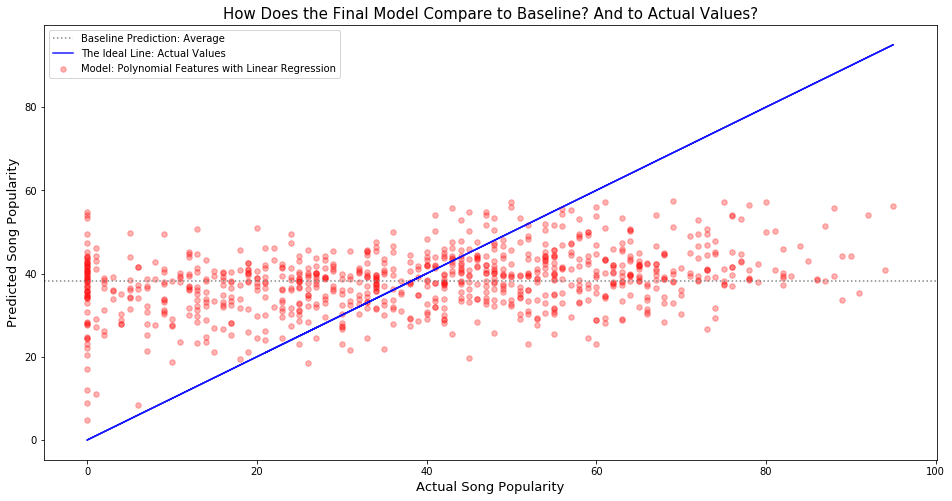

In [42]:
visualize_model(lm_sq_pred_t, y_test, bl, 'Polynomial Features with Linear Regression')

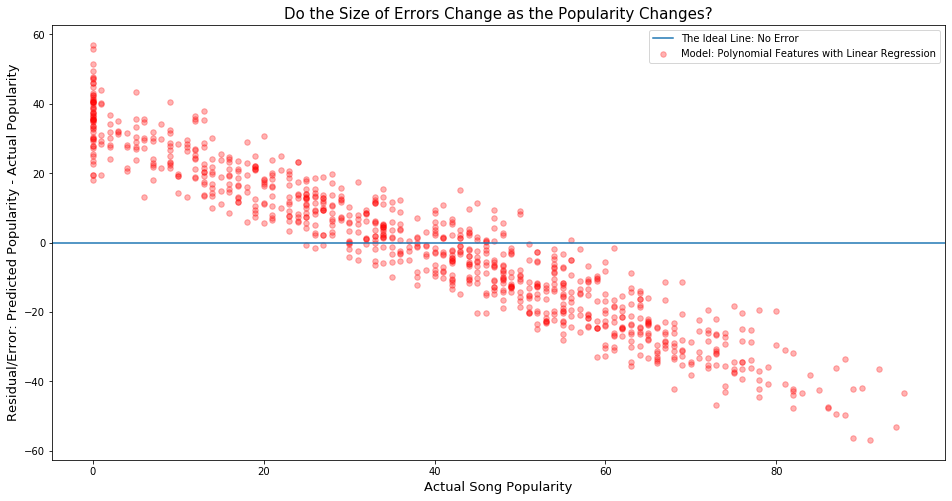

In [43]:
visualize_error(glm_pred_t, y_test, bl, 'Polynomial Features with Linear Regression')

In [51]:
def get_important_feats(model, X):
    feature_importances = pd.DataFrame(rf.featureimportances,
                                       index = X_train_scaled.columns,
                                        columns=['importance']).sort_values('importance',ascending=False)
    return feature_importances

Next
- put modeling prep into a function
- check the important feats for the ALL FEATURES MODEL
- clean up the notebook